# Tensorflow Regression Example

## Creating Data

In [28]:
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
X_data = np.linspace(0.0, 10.0, 10000)

In [3]:
noise = np.random.randn(len(X_data))

In [5]:
Y = (0.5 * X_data) + 5 + noise

In [9]:
my_data = pd.concat([pd.DataFrame(data=X_data,columns=['X Data']),pd.DataFrame(data=Y,columns=['Y'])],axis=1)

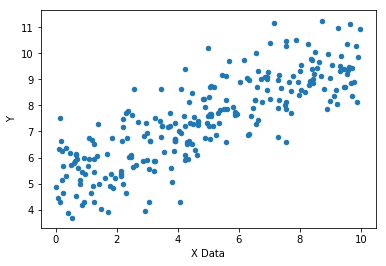

In [10]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')

## Tensorflow

In [11]:
import tensorflow as tf

C:\Users\Jayuk\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [12]:
batch_size = 8

### Variables

In [13]:
m = tf.Variable(0.5)
b = tf.Variable(1.0)

### Placeholders

In [14]:
xph = tf.placeholder(tf.float32, [batch_size])
yph = tf.placeholder(tf.float32, [batch_size])

### Graph

In [15]:
y_model = m*xph +b

### Loss Function

In [16]:
error = tf.reduce_sum(tf.square(yph-y_model))

### Optimizer

In [17]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0001)

In [18]:
train  = optimizer.minimize(error)

### Init

In [19]:
init = tf.global_variables_initializer()

### Session

In [20]:
with tf.Session() as sess:
    sess.run(init)
    batches = 1000
    for i in range(batches):
        rand_ind = np.random.randint(len(X_data), size=batch_size)
        feed_dict = {xph:X_data[rand_ind], yph:Y[rand_ind]}
        sess.run(train, feed_dict=feed_dict)
    model_m, model_b = sess.run([m,b])

In [21]:
model_m

0.89097303

In [22]:
model_b

2.3579953

In [23]:
Y_pred = X_data * model_m + model_b

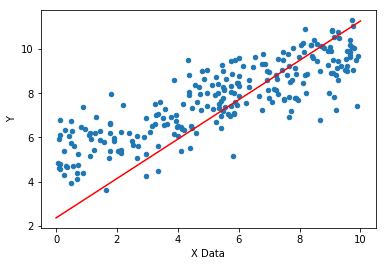

In [25]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(X_data,Y_pred,'r')

## TF Estimator API

In [26]:
feat_cols = [tf.feature_column.numeric_column('x', shape=[1])]

In [27]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Jayuk\\AppData\\Local\\Temp\\tmphcbee1nf', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002A869122048>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [30]:
x_train, x_eval, y_train, y_eval = train_test_split(X_data,Y,test_size=0.3, random_state = 101)

In [35]:
# Can also do .pandas_input_fn
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=4,num_epochs=None,shuffle=True)

In [36]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=4,num_epochs=1000,shuffle=False)

In [37]:
eval_func = tf.estimator.inputs.numpy_input_fn({'x':x_eval}, y_eval, batch_size=4, num_epochs=1000, shuffle=False)

In [38]:
estimator.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Jayuk\AppData\Local\Temp\tmphcbee1nf\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1000 into C:\Users\Jayuk\AppData\Local\Temp\tmphcbee1nf\model.ckpt.
INFO:tensorflow:loss = 9.080005, step = 1000
INFO:tensorflow:global_step/sec: 270.542
INFO:tensorflow:loss = 6.0037746, step = 1100 (0.371 sec)
INFO:tensorflow:global_step/sec: 300.859
INFO:tensorflow:loss = 5.452615, step = 1200 (0.332 sec)
INFO:tensorflow:global_step/sec: 274.858
INFO:tensorflow:loss = 2.937522, step = 1300 (0.364 sec)
INFO:tensorflow:global_step/sec: 275.614
INFO:tensorflow:loss = 0.8691661, step = 1400 (0.364 sec)
INFO:tensorflow:global_step/sec: 285.025
INFO:tensorflow:loss = 6.987795, step = 1500 (0.349 sec)
INFO:tensorflow

In [39]:
train_metrics = estimator.evaluate(input_fn=train_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-10-13-09:26:28
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Jayuk\AppData\Local\Temp\tmphcbee1nf\model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-10-13-09:26:32
INFO:tensorflow:Saving dict for global step 2000: average_loss = 1.0327033, global_step = 2000, loss = 4.130813
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 2000: C:\Users\Jayuk\AppDat

In [40]:
eval_metrics = estimator.evaluate(input_fn=eval_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-10-13-09:27:05
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Jayuk\AppData\Local\Temp\tmphcbee1nf\model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-10-13-09:27:10
INFO:tensorflow:Saving dict for global step 2000: average_loss = 1.0355511, global_step = 2000, loss = 4.1422043
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 2000: C:\Users\Jayuk\AppDa

In [41]:
print("train metrics: {}".format(train_metrics))
print("eval metrics: {}".format(eval_metrics))

train metrics: {'average_loss': 1.0327033, 'loss': 4.130813, 'global_step': 2000}
eval metrics: {'average_loss': 1.0355511, 'loss': 4.1422043, 'global_step': 2000}


### Predictions

In [44]:
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x':np.linspace(0,10,10)}, shuffle=False)

In [45]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Jayuk\AppData\Local\Temp\tmphcbee1nf\model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.8902626], dtype=float32)},
 {'predictions': array([5.4942627], dtype=float32)},
 {'predictions': array([6.0982633], dtype=float32)},
 {'predictions': array([6.7022634], dtype=float32)},
 {'predictions': array([7.306264], dtype=float32)},
 {'predictions': array([7.9102635], dtype=float32)},
 {'predictions': array([8.514264], dtype=float32)},
 {'predictions': array([9.118264], dtype=float32)},
 {'predictions': array([9.722265], dtype=float32)},
 {'predictions': array([10.326264], dtype=float32)}]

In [46]:
predictions = []# np.array([])
for x in estimator.predict(input_fn=input_fn_predict):
    predictions.append(x['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Jayuk\AppData\Local\Temp\tmphcbee1nf\model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [47]:
predictions

[array([4.8902626], dtype=float32),
 array([5.4942627], dtype=float32),
 array([6.0982633], dtype=float32),
 array([6.7022634], dtype=float32),
 array([7.306264], dtype=float32),
 array([7.9102635], dtype=float32),
 array([8.514264], dtype=float32),
 array([9.118264], dtype=float32),
 array([9.722265], dtype=float32),
 array([10.326264], dtype=float32)]

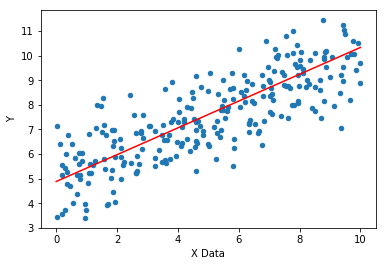

In [48]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(np.linspace(0,10,10),predictions,'r')